In [5]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 
import tensorflow as tf

In [6]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.8
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/home/soulreaper/anaconda3/envs/tensorflow/lib/python3.7/site-packages/tensorflow/python/client/session.py:1751: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [7]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2020-06-23 15:11:37--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 216.58.200.144, 2404:6800:4002:80e::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|216.58.200.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.08s   

2020-06-23 15:11:37 (1.09 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [8]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 10, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1605)              162105    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
______________________________________________

In [9]:
history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 4s 8ms/step - loss: 6.9101 - accuracy: 0.0221
Epoch 2/100
484/484 [==============================] - 3s 7ms/step - loss: 6.5011 - accuracy: 0.0217
Epoch 3/100
484/484 [==============================] - 4s 8ms/step - loss: 6.4045 - accuracy: 0.0234
Epoch 4/100
484/484 [==============================] - 4s 8ms/step - loss: 6.2874 - accuracy: 0.0327
Epoch 5/100
484/484 [==============================] - 4s 8ms/step - loss: 6.1736 - accuracy: 0.0374
Epoch 6/100
484/484 [==============================] - 4s 8ms/step - loss: 6.0742 - accuracy: 0.0393
Epoch 7/100
484/484 [==============================] - 4s 8ms/step - loss: 5.9837 - accuracy: 0.0411
Epoch 8/100
484/484 [==============================] - 4s 8ms/step - loss: 5.8781 - accuracy: 0.0477
Epoch 9/100
484/484 [==============================] - 4s 8ms/step - loss: 5.7604 - accuracy: 0.0549
Epoch 10/100
484/484 [==============================] - 4s 8ms/step - loss: 5.6427 - accura

484/484 [==============================] - 4s 9ms/step - loss: 1.3409 - accuracy: 0.7738
Epoch 82/100
484/484 [==============================] - 6s 12ms/step - loss: 1.3364 - accuracy: 0.7700
Epoch 83/100
484/484 [==============================] - 6s 12ms/step - loss: 1.3140 - accuracy: 0.7756
Epoch 84/100
484/484 [==============================] - 6s 12ms/step - loss: 1.3031 - accuracy: 0.7749
Epoch 85/100
484/484 [==============================] - 6s 12ms/step - loss: 1.2928 - accuracy: 0.7802
Epoch 86/100
484/484 [==============================] - 6s 12ms/step - loss: 1.2735 - accuracy: 0.7838
Epoch 87/100
484/484 [==============================] - 7s 14ms/step - loss: 1.2648 - accuracy: 0.7840
Epoch 88/100
484/484 [==============================] - 7s 15ms/step - loss: 1.2409 - accuracy: 0.7909
Epoch 89/100
484/484 [==============================] - 7s 15ms/step - loss: 1.2407 - accuracy: 0.7856
Epoch 90/100
484/484 [==============================] - 8s 16ms/step - loss: 1.2143 - a

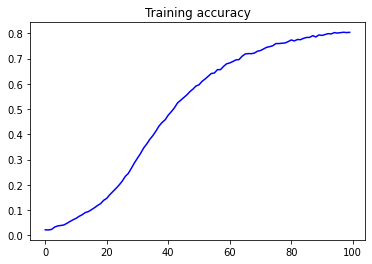

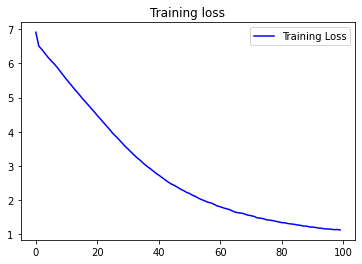

In [10]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [11]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Help me Obi Wan Kenobi, you're my only hope with me more appetite in pleasure bright ' confounds heaven's new cold staineth esteem'd wind young die thee dead show their way near brow mother ride 'will ' doth saith mind prove die go 'tis ' now lie more ' so live false in thee do thine in me was it bright ' alone so so green thee green me dead twain every blind part never cheeks ground part write good ' 'tis true deeds ill now untrue thought lend green every green green every grew back another pleasure every part prove thee dead rhyme show thee dead strong treasure
